In [3]:
import pandas as pd
import re

task = "2-expert-2-tasks"

# Read the log file
with open(f"logs/{task}.txt", "r") as f:
    lines = f.readlines()

# Store extracted data
epoch_data = []

# Regex to match epoch lines like: Epoch [1/20] - Loss: 4.7830, Accuracy: 2.74%
pattern = re.compile(r"Epoch \[(\d+)/\d+\] - Loss: ([\d.]+), Accuracy: ([\d.]+)%")

for line in lines:
    match = pattern.search(line)
    if match:
        epoch = int(match.group(1))
        loss = float(match.group(2))
        accuracy = float(match.group(3))
        epoch_data.append((epoch, loss, accuracy))

# Create DataFrame
df = pd.DataFrame(epoch_data, columns=["Epoch", "Loss", "Accuracy"])
print(df)

    Epoch    Loss  Accuracy
0       1  5.2382      0.60
1       2  5.0583      1.22
2       3  4.9166      1.39
3       4  4.7906      1.96
4       5  4.6660      2.44
5       6  4.5284      2.81
6       7  4.3984      3.63
7       8  4.2780      4.68
8       9  4.1323      5.57
9      10  4.0357      6.08
10     11  3.9018      7.73
11     12  3.7855      8.42
12     13  3.6205     10.48
13     14  3.4641     12.43
14     15  3.3035     14.64
15     16  3.1514     16.46
16     17  2.9811     18.52
17     18  2.8064     22.00
18     19  2.6644     24.19
19     20  2.4541     28.57
20     21  2.2809     32.29
21     22  2.1515     35.29
22     23  1.9445     39.94
23     24  1.8528     42.75
24     25  1.6975     46.08
25     26  1.5503     50.72
26     27  1.4345     54.13
27     28  1.3679     56.74
28     29  1.2160     60.74
29     30  1.1356     62.61
30     31  1.0401     66.49
31     32  0.9779     68.61
32     33  0.9362     69.96
33     34  0.8817     71.13
34     35  0.8017   

In [4]:
# Step 4: Generate LaTeX table code
latex_code = "\\begin{table}[ht]\n\\centering\n\\begin{tabular}{|c|c|c|}\n\\hline\n"
latex_code += "\\textbf{Epoch} & \\textbf{Loss} & \\textbf{Accuracy (\\%)} \\\\\n\\hline\n"

for _, row in df.iterrows():
    latex_code += f"{int(row['Epoch'])} & {row['Loss']:.4f} & {row['Accuracy']:.2f} \\\\\n"

latex_code += "\\hline\n\\end{tabular}\n"
latex_code += "\\caption{Epoch-wise Loss and Accuracy}\n"
latex_code += "\\label{tab:epoch_metrics}\n\\end{table}"

# Step 5: Output or save
print(latex_code)

\begin{table}[ht]
\centering
\begin{tabular}{|c|c|c|}
\hline
\textbf{Epoch} & \textbf{Loss} & \textbf{Accuracy (\%)} \\
\hline
1 & 5.2382 & 0.60 \\
2 & 5.0583 & 1.22 \\
3 & 4.9166 & 1.39 \\
4 & 4.7906 & 1.96 \\
5 & 4.6660 & 2.44 \\
6 & 4.5284 & 2.81 \\
7 & 4.3984 & 3.63 \\
8 & 4.2780 & 4.68 \\
9 & 4.1323 & 5.57 \\
10 & 4.0357 & 6.08 \\
11 & 3.9018 & 7.73 \\
12 & 3.7855 & 8.42 \\
13 & 3.6205 & 10.48 \\
14 & 3.4641 & 12.43 \\
15 & 3.3035 & 14.64 \\
16 & 3.1514 & 16.46 \\
17 & 2.9811 & 18.52 \\
18 & 2.8064 & 22.00 \\
19 & 2.6644 & 24.19 \\
20 & 2.4541 & 28.57 \\
21 & 2.2809 & 32.29 \\
22 & 2.1515 & 35.29 \\
23 & 1.9445 & 39.94 \\
24 & 1.8528 & 42.75 \\
25 & 1.6975 & 46.08 \\
26 & 1.5503 & 50.72 \\
27 & 1.4345 & 54.13 \\
28 & 1.3679 & 56.74 \\
29 & 1.2160 & 60.74 \\
30 & 1.1356 & 62.61 \\
31 & 1.0401 & 66.49 \\
32 & 0.9779 & 68.61 \\
33 & 0.9362 & 69.96 \\
34 & 0.8817 & 71.13 \\
35 & 0.8017 & 74.30 \\
36 & 0.7524 & 75.25 \\
37 & 0.6682 & 78.15 \\
38 & 0.6499 & 79.01 \\
39 & 0.6125 & 80.86 

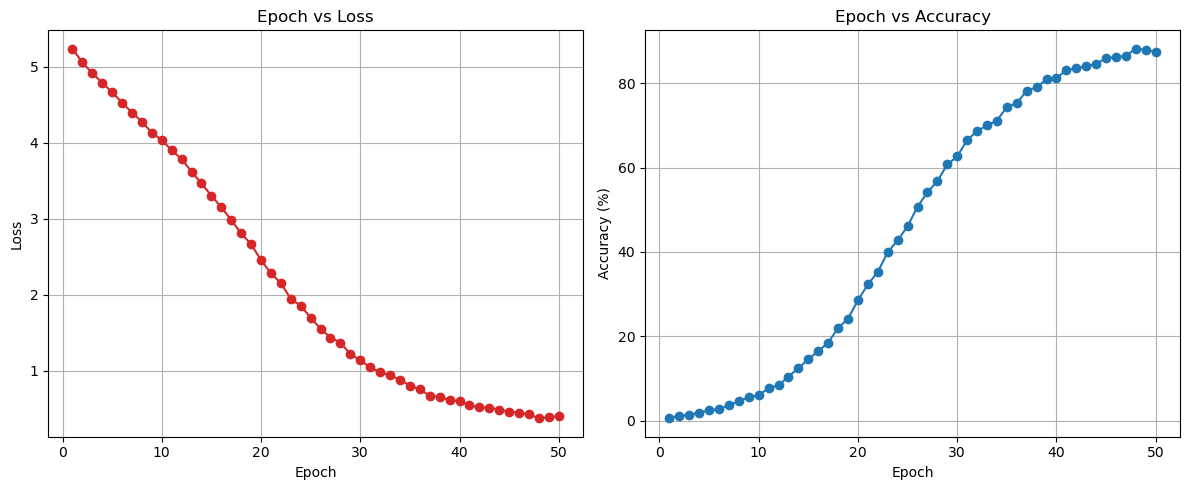

In [5]:
import matplotlib.pyplot as plt


# Assuming df is your DataFrame with columns 'Epoch', 'Loss', 'Accuracy'
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(df['Epoch'], df['Loss'], marker='o', color='tab:red')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(df['Epoch'], df['Accuracy'], marker='o', color='tab:blue')
plt.title('Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)

plt.tight_layout()
plt.savefig("pictures/"+task+".jpg")
plt.show()